# Assignment (6) : Logistic Regression

### Example (1) : Whether the client has subscribed a term deposit or not 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
bank = pd.read_csv("bank-full.csv", sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.shape

(45211, 17)

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
len(bank['campaign'].unique())

48

<AxesSubplot:xlabel='campaign', ylabel='count'>

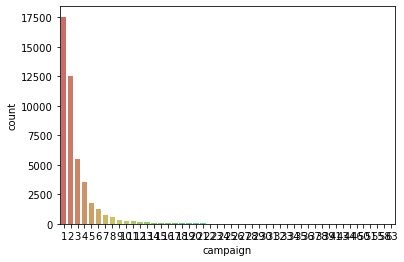

In [7]:
# Visualisation
sns.countplot(x= 'campaign', data=bank, palette="hls") 

{'whiskers': [<matplotlib.lines.Line2D at 0x184d84808e0>,
 'caps': [<matplotlib.lines.Line2D at 0x184d8480fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x184d8480580>],
 'medians': [<matplotlib.lines.Line2D at 0x184d84956a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x184d8495a00>],
 'means': []}

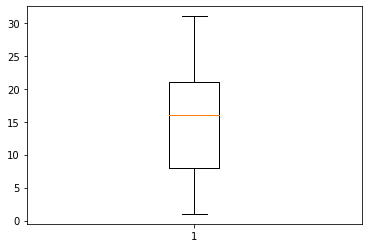

In [8]:
plt.boxplot(bank['day'])

<AxesSubplot:xlabel='age'>

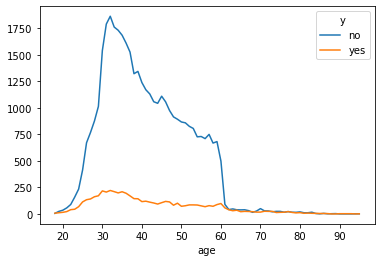

In [9]:
pd.crosstab(bank['age'], bank['y']).plot(kind= 'line')

# It shows that more clients have not subscribed a term deposit & we must tackle age group of 30 to 60 to improve penetration

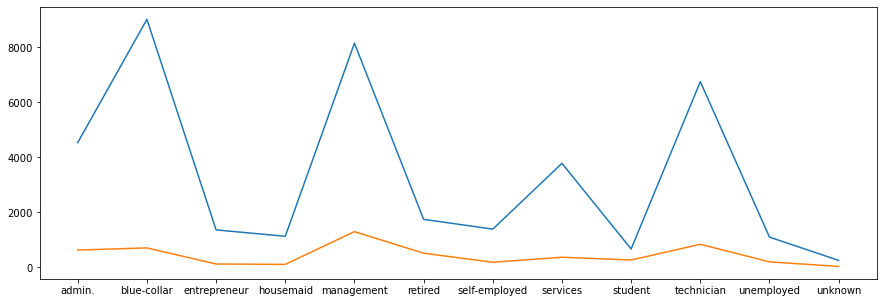

In [10]:
plt.figure(figsize=(15,5))
job_y = pd.crosstab(bank['job'], bank['y'])
plt.plot(job_y)

In [11]:
# Dummies for Categorical data

bank = pd.get_dummies(bank,columns=['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'], drop_first=True)
bank.tail(10)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
45201,53,583,17,226,1,184,4,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45202,34,557,17,224,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45203,23,113,17,266,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45204,73,2850,17,300,1,40,8,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45205,25,505,17,386,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
45210,37,2971,17,361,2,188,11,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [13]:
# Model Building
# Selecting all the features

from sklearn.linear_model import LogisticRegression
x = bank.iloc[:,:42]
y = bank.iloc[:,42]

In [12]:
# For output variable i.e. 'y' -->  0 : 'no' [client has not subscribed a TD] & 1 : 'yes' [client has subscribed a TD]
bank.shape

(45211, 43)

In [27]:
# Model Building
# Selecting all the features

from sklearn.linear_model import LogisticRegression
x = bank.iloc[:,:42]
y = bank.iloc[:,42]
LR = LogisticRegression()
LR.fit(x, y)

C:\Users\hp\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# Dividing into training & testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 0)

In [29]:
y_pred_train = LR.predict(x_train)
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, y_pred_train)
acc_train*100

89.2185673207571

In [30]:
y_pred_test = LR.predict(x_test)
from sklearn.metrics import accuracy_score
acc_test = accuracy_score(y_test, y_pred_test)
acc_test*100

88.86021822471247

In [31]:
y_prob = pd.DataFrame(LR.predict_proba(x.iloc[:,:]))
bank_df = pd.concat([bank,y_prob],axis=1)
bank_df  

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes,0,1
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0.953636,0.046364
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0.974035,0.025965
2,33,2,5,76,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,0.980972,0.019028
3,47,1506,5,92,1,-1,0,1,0,0,...,1,0,0,0,0,0,1,0,0.978516,0.021484
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0.892487,0.107513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,1,0,0,0,0,1,1,0.397097,0.602903
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,1,0,0,0,0,1,1,0.751343,0.248657
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,1,0,0,0,1,0,1,0.342747,0.657253
45209,57,668,17,508,4,-1,0,1,0,0,...,0,1,0,0,0,0,1,0,0.915551,0.084449


In [32]:
# Checking accuracy of model with confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_test)
print (confusion_matrix) 

[[11735   234]
 [ 1277   318]]


In [33]:
# Output classification report

from sklearn.metrics import classification_report 
print (classification_report (y_test, y_pred_test))  

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.58      0.20      0.30      1595

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564



In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score= roc_auc_score(y,LR.predict(x))
Logit_roc_score 

0.5966007367230535

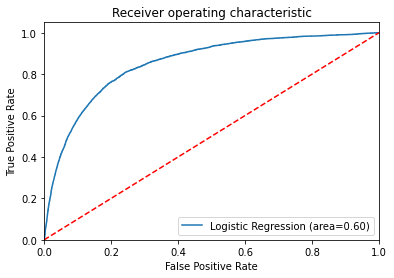

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y,LR.predict_proba(x)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   